Análisis del modelo de regresión
En este notebook se encuentra en análisis de un modelo de regresión para una imágen conocida y otra completamente desconocida. La metodología utilizada es encontrar la distancia de reconstrucción y luego reconstruir esta imagen utilizando la función as_reconstruct_r la cual se importa de dlhm_functions

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from dlhm_functions import *
from time import perf_counter

In [3]:
model = tf.keras.models.load_model(r'C:\Users\mlope\OneDrive - Universidad EAFIT\EAFIT\Autofocusing\Models\6E+S_Convolution1_150_Epochs\Model6E+S_Convolution1_150_Epochs.h5')

In [4]:
df = pd.read_excel(r'C:\Users\mlope\OneDrive - Universidad EAFIT\EAFIT\Autofocusing\Dataframes\HolorsTotal.xlsx')

Took 0.6200490999999602 seconds to find the distance and reconstruct the hologram
The percentage error of the distance for this image is [[1.69654075]]%
The correlation btn the predicted and the real image is 0.8754235831974597


Text(0.5, 1.0, 'Recontrucción verídica, d = [19.64] mm')

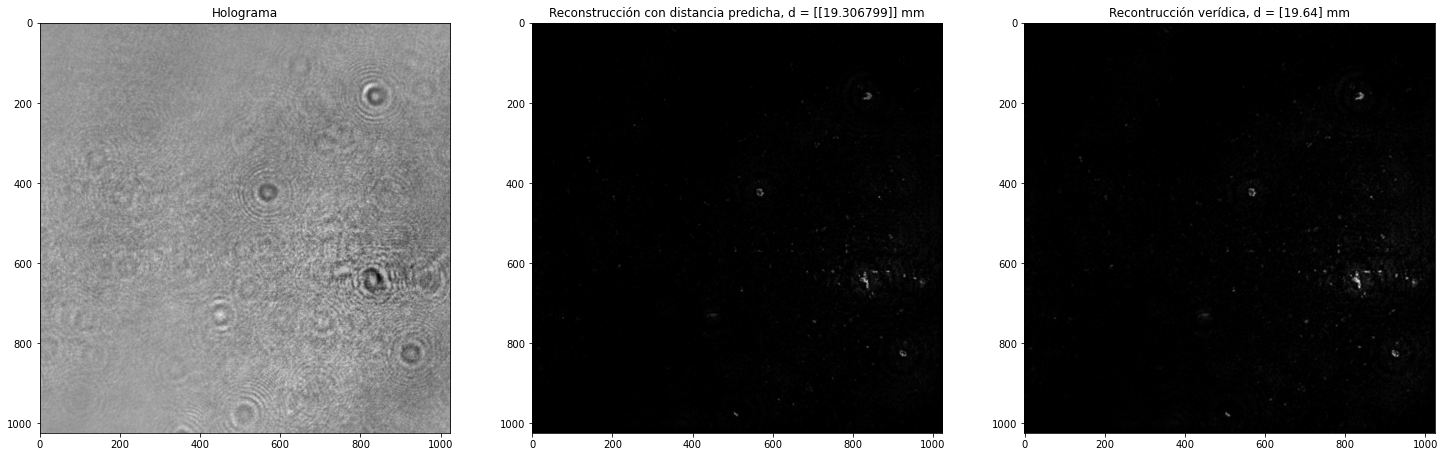

In [21]:
h_dir = r'C:\Users\mlope\OneDrive - Universidad EAFIT\EAFIT\Autofocusing\Datasets\E\Holors'
r_dir = r'C:\Users\mlope\OneDrive - Universidad EAFIT\EAFIT\Autofocusing\Datasets\E\Reconstructions'
file_name = 'D3_324.png'
h = np.asarray([imread(f"{h_dir}/{file_name.split('_')[0]}/{file_name}")]).astype(np.float32)
r = np.asarray(imread(f"{r_dir}/{file_name.split('_')[0]}/{file_name}")).astype(np.float32)
d = (df[df.name == file_name.split('.')[0]]).distance.values
t1 = perf_counter()
dp = model.predict(h)
holor = np.array(Image.open(f"{h_dir}/{file_name.split('_')[0]}/{file_name}")).astype('float')
holor = (holor/255)*2-1
p = np.abs(as_reconstruct_r(holor,3.7e-3/1024,473e-9,dp)) ** 2
p = p/p.max()
t2 = perf_counter()
print(f'Took {str(t2-t1)} seconds to find the distance and reconstruct the hologram')
print(f'The percentage error of the distance for this image is {str(np.abs((dp-d)/d)*100)}%')
corr = np.corrcoef(r.flat, p.flat)
print(f'The correlation btn the predicted and the real image is {str(corr[0,1])}')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(25, 8)
ax1.imshow(h.reshape(1024, 1024), cmap='gray')
ax1.set_title('Holograma')
ax2.imshow(p.reshape(1024,1024) , cmap='gray')
ax2.set_title(f'Reconstrucción con distancia predicha, d = {dp*1e3} mm')
ax3.imshow(r.reshape(1024, 1024), cmap='gray')
ax3.set_title(f'Recontrucción verídica, d = {d*1e3} mm')

Took 0.7892285999996602 seconds to find the distance and reconstruct the hologram
The percentage error of the distance for this image is [[52.842377]]%
The correlation btn the predicted and the real image is 0.7980274878626836


Text(0.5, 1.0, 'Recontrucción verídica, d = 14.0 mm')

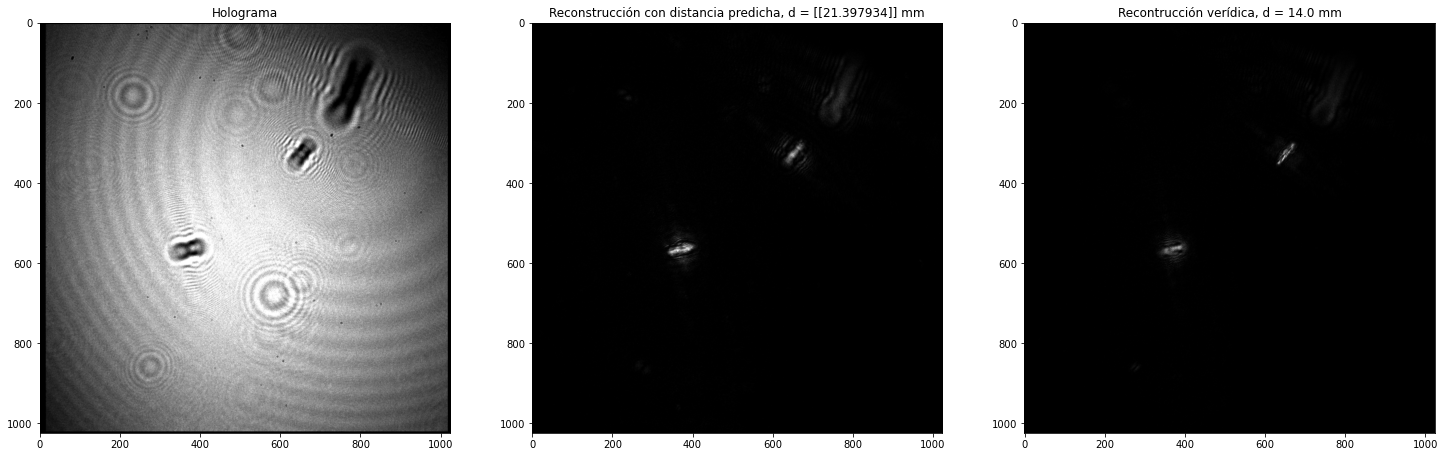

In [22]:
dir = r'C:\Users\mlope\OneDrive - Universidad EAFIT\EAFIT\Autofocusing\Datasets\Different_holograms'
h = np.asarray([imread(f"{dir}/h1.bmp")]).astype(np.float32)
d = 14e-3
t1 = perf_counter()
dp = model.predict(h)
holo = np.array(Image.open(f"{dir}/h1.bmp")).astype('float') / 255
ref = np.array(Image.open(f"{dir}/r1.bmp")).astype('float') / 255
holor = holo-ref
r = np.abs(as_reconstruct_r(holor,3.7e-3/1024,473e-9,d)) ** 2
p = np.abs(as_reconstruct_r(holor,3.7e-3/1024,473e-9,dp)) ** 2
p = p/p.max()
t2 = perf_counter()
print(f'Took {str(t2-t1)} seconds to find the distance and reconstruct the hologram')
print(f'The percentage error of the distance for this image is {str(np.abs((dp-d)/d)*100)}%')
corr = np.corrcoef(r.flat, p.flat)
print(f'The correlation btn the predicted and the real image is {str(corr[0,1])}')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(25, 8)
ax1.imshow(h.reshape(1024, 1024), cmap='gray')
ax1.set_title('Holograma')
ax2.imshow(p.reshape(1024,1024) , cmap='gray')
ax2.set_title(f'Reconstrucción con distancia predicha, d = {dp*1e3} mm')
ax3.imshow(r.reshape(1024, 1024), cmap='gray')
ax3.set_title(f'Recontrucción verídica, d = {d*1e3} mm')